In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
class PMF:
    def __init__(self):
        pass
    
    def random_variable(self, distribution_name):
        """
        Print explanation of the random variable.
        
        Parameters:
        distribution_name (str): Name of the probability distribution.
        """
        explanations = {
            'Bernoulli': "A Bernoulli distribution represents the probability of success (1) or failure (0) in a single trial.",
            'geometric': "A Geometric distribution represents the number of trials needed until the first success in a sequence of independent Bernoulli trials.",
            'binomial': "A Binomial distribution represents the number of successes in a fixed number of independent Bernoulli trials.",
            'negative-Binomial': "A Negative Binomial distribution represents the number of failures before a specified number of successes in a sequence of independent Bernoulli trials.",
            'hypergeometric': "A Hypergeometric distribution represents the number of successes in a sample drawn without replacement from a finite population.",
            'poisson': "A Poisson distribution represents the number of events occurring in a fixed interval of time or space, given a constant rate of occurrence and independence between events."
        }
        
        if distribution_name in explanations:
            print(explanations[distribution_name])
        else:
            print("Explanation not available for this distribution.")
    
    def Bernoulli(self, p=0.5):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Bernoulli distribution.
        
        Parameters:
        p (float): Probability of success (default: 0.5).
        """
        x_values = [0, 1]
        probabilities = [1 - p, p]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xticks(x_values)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Bernoulli Distribution')
        plt.show()
        
        estimate = p
        variance = p * (1 - p)
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def geometric(self, p=0.5, max_trials=20):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Geometric distribution.
        
        Parameters:
        p (float): Probability of success (default: 0.5).
        max_trials (int): Maximum number of trials (default: 20).
        """
        x_values = np.arange(1, max_trials+1)
        probabilities = [(1 - p)**(x - 1) * p for x in x_values]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Geometric Distribution')
        plt.show()
        
        estimate = 1 / p
        variance = (1 - p) / p**2
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def binomial(self, n=10, p=0.5):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Binomial distribution.
        
        Parameters:
        n (int): Number of trials (default: 10).
        p (float): Probability of success (default: 0.5).
        """
        x_values = np.arange(0, n+1)
        probabilities = [self._binomial_coefficient(n, k) * p**k * (1-p)**(n-k) for k in x_values]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Binomial Distribution')
        plt.show()
        
        estimate = n * p
        variance = n * p * (1 - p)
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def negative_binomial(self, k=5, p=0.5):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Negative Binomial distribution.
        
        Parameters:
        k (int): Number of successes (default: 5).
        p (float): Probability of success (default: 0.5).
        """
        x_values = np.arange(k, k+20)
        probabilities = [self._binomial_coefficient(x-1, k-1) * p**k * (1-p)**(x-k) for x in x_values]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Negative Binomial Distribution')
        plt.show()
        
        estimate = k / p
        variance = k * (1 - p) / p**2
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def hypergeometric(self, N=20, K=10, n=5):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Hypergeometric distribution.
        
        Parameters:
        N (int): Total number of objects (default: 20).
        K (int): Total number of success objects (default: 10).
        n (int): Number of draws (default: 5).
        """
        x_values = np.arange(max(0, n-K), min(n, K)+1)
        probabilities = [(self._binomial_coefficient(K, k) * self._binomial_coefficient(N-K, n-k)) / self._binomial_coefficient(N, n) for k in x_values]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Hypergeometric Distribution')
        plt.show()
        
        estimate = n * (K / N)
        variance = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def poisson(self, lmbda=3, max_events=10):
        """
        Generate probability distribution table, plot, estimate, variance, and standard deviation for a Poisson distribution.
        
        Parameters:
        lmbda (float): Rate of occurrence (default: 3).
        max_events (int): Maximum number of events (default: 10).
        """
        x_values = np.arange(0, max_events+1)
        probabilities = [np.exp(-lmbda) * (lmbda**k) / np.math.factorial(k) for k in x_values]
        df = pd.DataFrame({'x': x_values, 'P(X=x)': probabilities})
        
        plt.bar(x_values, probabilities, align='center', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('P(X=x)')
        plt.title('Poisson Distribution')
        plt.show()
        
        estimate = lmbda
        variance = lmbda
        std_deviation = np.sqrt(variance)
        
        return df, estimate, variance, std_deviation
    
    def _binomial_coefficient(self, n, k):
        """
        Calculate binomial coefficient (n choose k).
        
        Parameters:
        n (int): Total number of trials.
        k (int): Number of successes.
        
        Returns:
        int: Binomial coefficient (n choose k).
        """
        return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))


A Poisson distribution represents the number of events occurring in a fixed interval of time or space, given a constant rate of occurrence and independence between events.


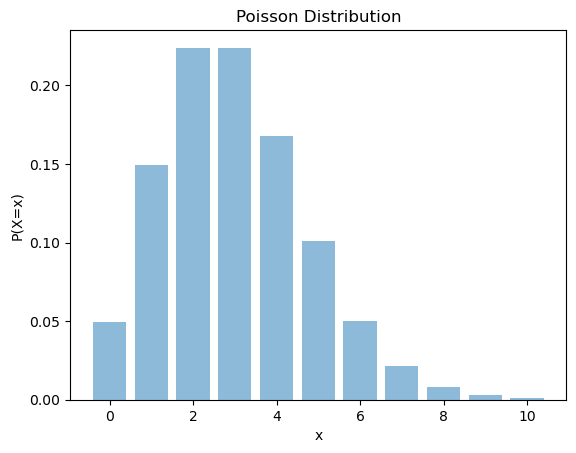

     x    P(X=x)
0    0  0.049787
1    1  0.149361
2    2  0.224042
3    3  0.224042
4    4  0.168031
5    5  0.100819
6    6  0.050409
7    7  0.021604
8    8  0.008102
9    9  0.002701
10  10  0.000810
Estimate: 3
Variance: 3
Standard Deviation: 1.7320508075688772


In [12]:
pmf = PMF()
pmf.random_variable("poisson")
df, estimate, variance, std_deviation = pmf.poisson()
print(df)
print("Estimate:", estimate)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)


In [14]:
df.T

,0,1,2,3,4,5,6,7,8,9,10
x,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.00000
P(X=x),0.049787,0.149361,0.224042,0.224042,0.168031,0.100819,0.050409,0.021604,0.008102,0.002701,0.00081


A Bernoulli distribution represents the probability of success (1) or failure (0) in a single trial.


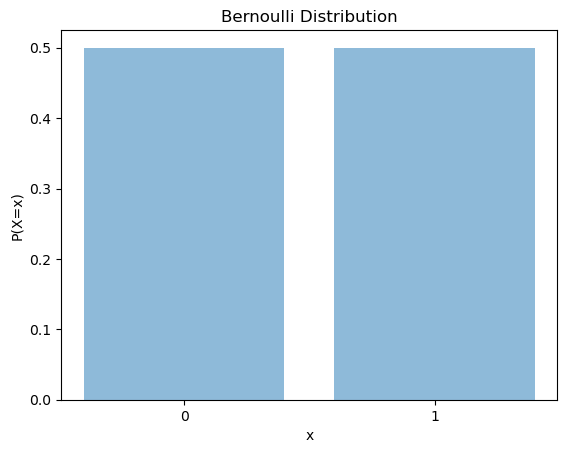

   x  P(X=x)
0  0     0.5
1  1     0.5
Estimate: 0.5
Variance: 0.25
Standard Deviation: 0.5


In [15]:
pmf = PMF()
pmf.random_variable("Bernoulli")
df, estimate, variance, std_deviation = pmf.Bernoulli()
print(df)
print("Estimate:", estimate)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)
